# Skyler's Salary Prediction Portfolio

## DEFINE

## We need a mean-squared-error (MSE) machine learning model to predict salaries for each role type in our testing data

In [1]:
''' this script defines a problem and discovers the data'''

__author__ = 'Skyler Bullard, Business Analyst'
__contactinfo__ = 'skyler.sci@gmail.com (changed)'

### import everything we might need

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

### load the data

In [3]:
path = 'C:/Users/sprtn/jupyter_project_files/salarypredictionportfolio/DSDJ-data-SalaryPredictions/data/'

test_features = pd.read_csv( open(path + 'test_features.csv') )
train_features = pd.read_csv( open(path + 'train_features.csv') )
train_salaries = pd.read_csv( open(path + 'train_salaries.csv') )

### examine the data

In [4]:
test_features.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [5]:
train_features.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [6]:
train_salaries.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


### use .info() to see length and datatypes

In [7]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [8]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [9]:
train_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


### check for duplicates

In [10]:
test_features.duplicated().sum()

0

In [11]:
train_features.duplicated().sum()

0

In [12]:
train_salaries.duplicated().sum()

0

### identify numerical and categorical variables

In [13]:
train_features.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [14]:
numeric_cols = [ 'yearsExperience', 'milesFromMetropolis' ]

In [15]:
categorical_cols = [ 'jobId', 'companyId', 'jobType', 'degree', 'major', 'industry' ]

## summarize numerical and categorical variables separately

In [16]:
train_features.describe( include = [ np.number ] )

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [17]:
train_features.describe( include = [ 'O' ] )

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684407687,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


## merge training data into a single dataframe

In [18]:
train_df = pd.merge( train_features , train_salaries , how = 'inner' , on = "jobId" )

In [19]:
del train_features
del train_salaries

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [21]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [22]:
train_df.salary.describe()

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64

In [23]:
#print the modal value of the training target
st.mode( train_df.salary )

ModeResult(mode=array([108], dtype=int64), count=array([10467]))

## use IQR rule to find potential outliers

In [24]:
#sort the training target
train_df.sort_values( 'salary' )

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
...,...,...,...,...,...,...,...,...,...
911747,JOB1362685319434,COMP3,CEO,BACHELORS,BUSINESS,FINANCE,24,28,294
293221,JOB1362684700908,COMP44,CEO,DOCTORAL,ENGINEERING,OIL,19,18,294
572777,JOB1362684980464,COMP60,CEO,MASTERS,ENGINEERING,OIL,22,1,298
685562,JOB1362685093249,COMP47,CTO,MASTERS,ENGINEERING,OIL,24,0,301


In [25]:
#The interquartile range (IQR) tells you the range of the middle half of your dataset.
#You can define outliers that fall outside of "fences"
stat_IQR = train_df.salary.describe()
IQR = stat_IQR[ '75%' ] - stat_IQR[ '25%' ]
upper_fence = stat_IQR[ '75%' ] + ( 1.5 * IQR )
lower_fence = stat_IQR[ '25%' ] - ( 1.5 * IQR )
print( 'The upper and lower bounds for what may be outliers are {} and {}.'.format( upper_fence , lower_fence ) )

The upper and lower bounds for what may be outliers are 220.5 and 8.5.


## outlier detection

In [26]:
#check past lower fence
train_df[ train_df.salary < 8.5 ]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [27]:
#check past upper fence
train_df.loc[ train_df.salary > 220.5 , 'jobType' ].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [28]:
#check most suspicious potential outliers past upper fence
train_df[ (train_df.salary > 220.5 ) & (train_df.jobType == 'JUNIOR' ) ]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


In [29]:
#remove zero salary data from training data
train_df = train_df[ train_df.salary != 0 ]

## visualize target

C:\Users\sprtn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


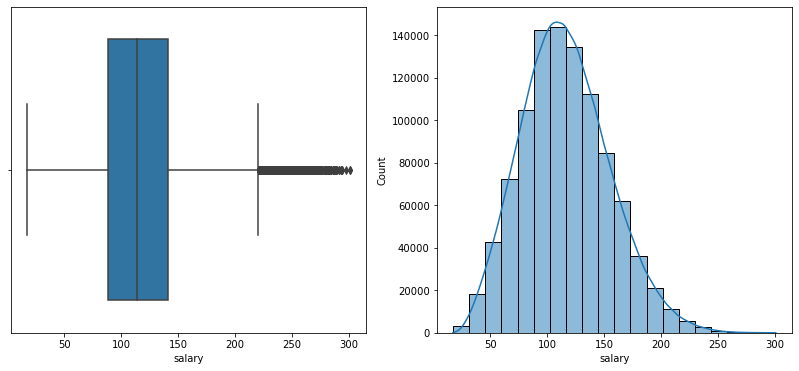

In [30]:
plt.figure( figsize = ( 14 , 6 ) )
plt.subplot( 1 , 2 , 1 )
sns.boxplot( train_df.salary )
plt.subplot( 1 , 2 , 2 )
sns.histplot( data = train_df.salary , bins = 20 , kde = True )
plt.show()

## plot features against target

In [31]:
def feature_plots( dataframe , column ):
    '''
    plot each feature
    left, distribution of features
    right, dependance of salary
    '''
    plt.figure( figsize = ( 14 , 6 ) )
    #first plot
    plt.subplot( 1 , 2 , 1 )
    #sort numerical series
    if dataframe[ column ].dtype == 'int64':
        #return counts of unique values , sort the series returned , visualize 
        dataframe[ column ].value_counts().sort_index().plot()
    #change column datatype to 'category' and order the level by mean salary
    else:
        mean = dataframe.groupby( column )['salary'].mean()
        dataframe[ column ] = dataframe[ column ].astype( 'category' )
        levels = mean.sort_values().index.tolist()
        dataframe[ column ].cat.reorder_categories( levels )
        dataframe[ column ].value_counts().plot()
    plt.xticks( rotation = 45 )
    plt.xlabel( column )
    plt.ylabel( 'Counts' )
    #second plot
    plt.subplot( 1 , 2 , 2 )
    if dataframe[ column ].dtype == 'int64' or column == 'companyId':
        mean = dataframe.groupby( column )[ 'salary' ].mean()
        std = dataframe.groupby( column )[ 'salary' ].std()
        mean.plot()
        #fill area between standard deviations from the mean
        plt.fill_between( range( len( std.index ) ) , mean.values - std.values , mean.values + std.values , alpha = 0.1 )
        
    else:
        sns.boxplot( x = column , y = 'salary' , data = dataframe )
        
    plt.xticks( rotation = 45 )
    plt.ylabel( 'Salaries' )
    plt.show()
         

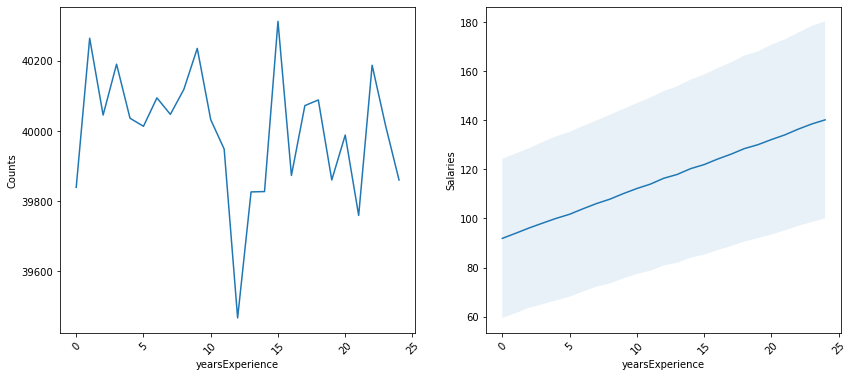

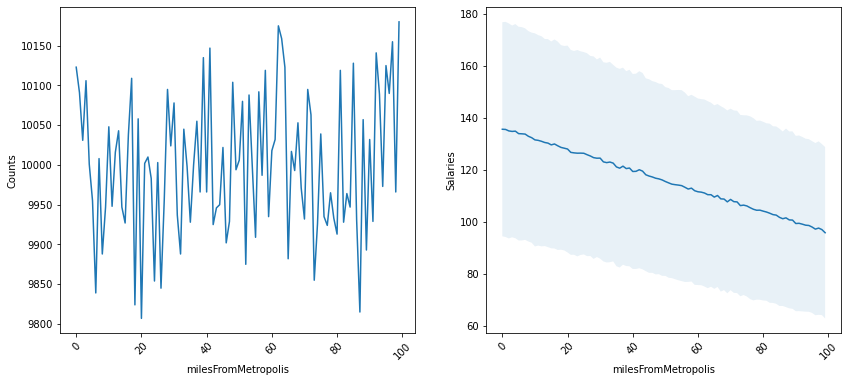

In [32]:
#plot quantitaive features
for column in numeric_cols:
    feature_plots( train_df , column )

## remove insignificant features to EDA

In [33]:
#declare a list of qualitative features
categorical_cols = [ 'jobType', 'degree', 'major', 'industry' ]

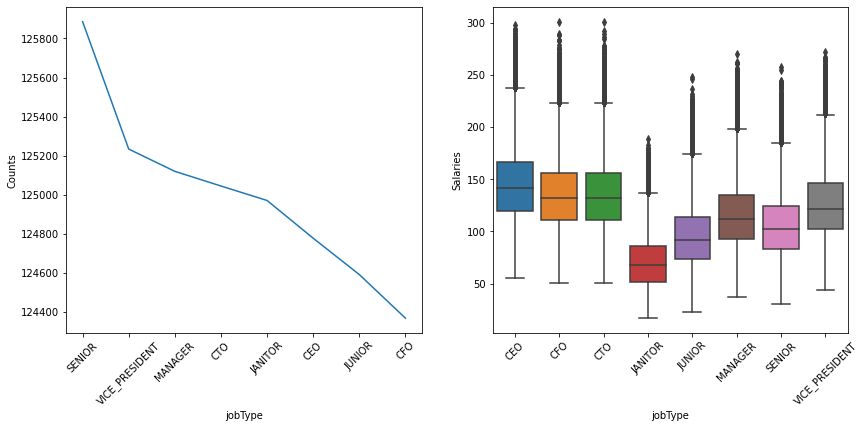

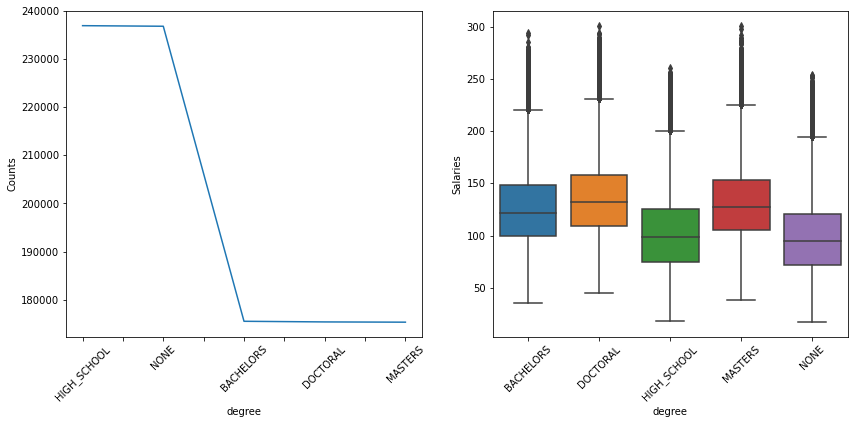

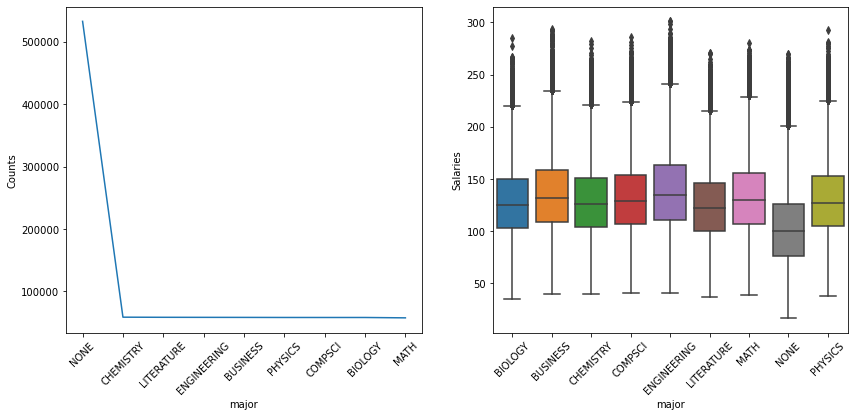

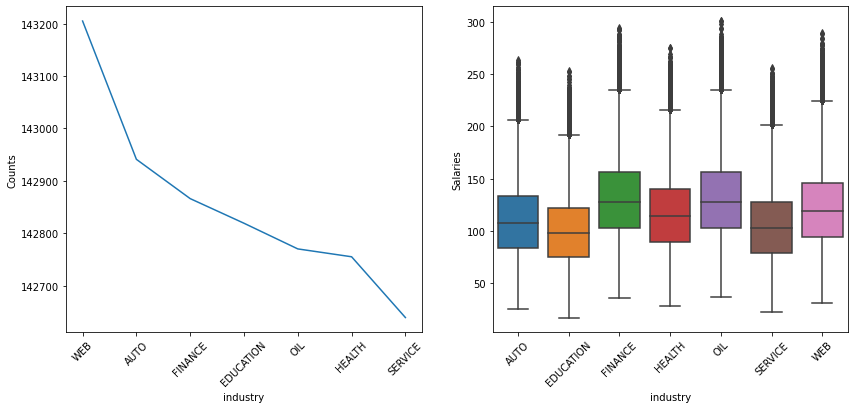

In [34]:
#plot qualitative features
for column in categorical_cols:
    feature_plots( train_df , column )

## Quantified version of seeing correlation of feature to target

In [35]:
#find correlation of quantitative values to target
train_df[ numeric_cols ].corrwith( train_df.salary )

yearsExperience        0.375013
milesFromMetropolis   -0.297686
dtype: float64

In [36]:
#find quantitative average of categorical features
def encode_cat( df , col ):
    cat_dict = {}
    cats = df[ col ].cat.categories.tolist()
    for cat in cats:
        #restrict dataframe to subset rows, take mean of columns corresponding to target
        cat_dict[ cat ] = train_df[ train_df[ col ] == cat ][ 'salary' ].mean()
    df[ col ] = df[ col ].map( cat_dict )

In [37]:
#convert categorical feature datatypes to quantitative value
for col in train_df.columns:
    if train_df[ col ].dtype.name == "category":
        encode_cat( train_df , col )
        train_df[ col ] = train_df[ col ].astype( 'int64' )

In [38]:
#drop unique values we do not have metadata for
train_df = train_df.drop( [ 'jobId' , 'companyId' ] , axis = 1 )

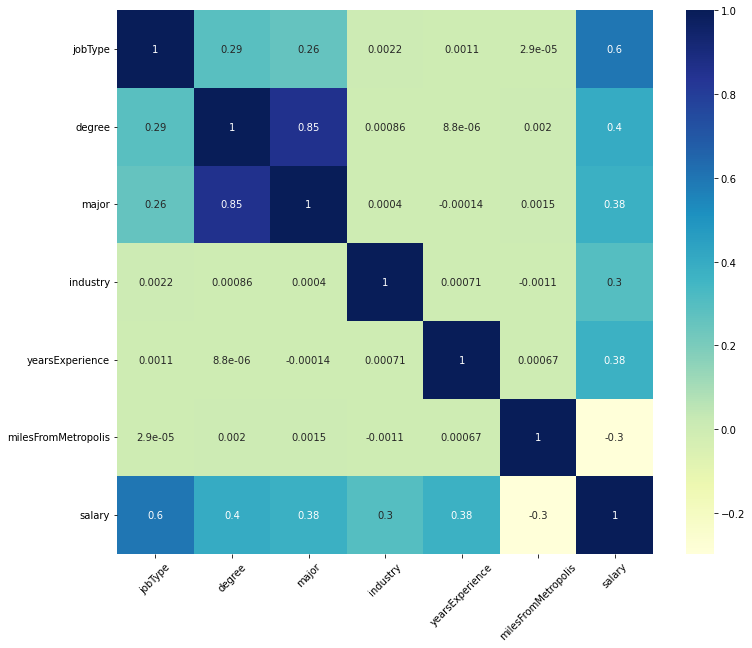

In [40]:
#find qualitative correlation to target
fig = plt.figure( figsize = ( 12 , 10 ) )
features = [ 'jobType' , 'degree' , 'major' , 'industry' , 'yearsExperience' , 'milesFromMetropolis' , 'salary' ]
sns.heatmap( train_df[ features ].corr() , cmap = 'YlGnBu' , annot = True )
plt.xticks( rotation = 45 )
plt.show()